In [1]:
from sklearn.metrics import cohen_kappa_score
from krippendorff import krippendorff_alpha
import pandas as pd
import numpy

In [5]:
data = pd.read_csv("adverb_annotations.csv")

In [6]:
data["llm"] = data["llm"].str.lstrip("adverb.")

In [7]:
data.head()

,adverb,cluster,sentence,jooyoung,scott,Column 1,jader,Column 1.1,match?,llm,Column 2
0,arrogantly,0,maybe <t>arrogantly</t> is a better word.,NaN,NaN,NaN,NaN,?,NaN,manner,NaN
1,arrogantly,1,"if you have three steps to do, and you take th...",manner,NaN,NaN,manner,NaN,NaN,manner,NaN
2,arrogantly,2,that is so <t>arrogantly</t> phallic!,degree,NaN,?,manner,NaN,*,manner,seems like manner. 'so' already is degree
3,boldly,0,"its continuing mission, to explore strange new...",manner,NaN,NaN,manner,NaN,NaN,manner,NaN
4,boldly,1,"the swimming-pool, <t>boldly</t> projected in ...",manner,NaN,NaN,manner,NaN,NaN,manner,NaN


In [8]:
df = data[["jooyoung", "jader", "llm"]].dropna()

In [9]:
kappa = cohen_kappa_score(df["jooyoung"], df["llm"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.3636205698401668


In [11]:
kappa = cohen_kappa_score(df["jader"], df["llm"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.37984296563264264


In [12]:
kappa = cohen_kappa_score(df["jooyoung"], df["jader"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.6230575109576305


<Figure size 1300x2500 with 0 Axes>

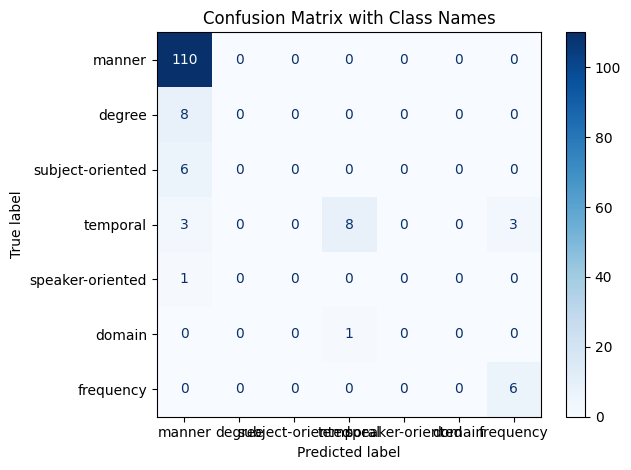

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = df["jooyoung"].unique()
# Compute confusion matrix
cm = confusion_matrix(df["jooyoung"], df["llm"], labels=labels)

# Plot confusion matrix

plt.figure(figsize=(13,25))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix with Class Names")
plt.tight_layout()
plt.savefig("cm.png")